# * Kurapati Venkatesh

# * 09012021

# * Topic: Forecasting – Time Series  ✨🚀

# ---------------------------------------------------------------------------

## Problem Statement:

## A Plastic manufacturing plant has recorded their sales data from 1949 to 1953 monthly. Perform Forecasting on the data and bring out insights from it, forecast the sale for the next year. 

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To prepare a prediction model  - To Perform Forecasting on the data and bring out insights from it, forecast the sale for the next year. 

## -------------------------------------------------------------------------------------------

## import libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

## import dataset:

In [2]:
plastic = pd.read_csv(r"G:\360digit\assignments meterial\forecasting\PlasticSales.csv")

##### Converting the normal index:

In [4]:
plastic.index = pd.to_datetime(plastic.Month,format="%b-%y")

In [5]:
plastic.index

DatetimeIndex(['2049-01-01', '2049-02-01', '2049-03-01', '2049-04-01',
               '2049-05-01', '2049-06-01', '2049-07-01', '2049-08-01',
               '2049-09-01', '2049-10-01', '2049-11-01', '2049-12-01',
               '2050-01-01', '2050-02-01', '2050-03-01', '2050-04-01',
               '2050-05-01', '2050-06-01', '2050-07-01', '2050-08-01',
               '2050-09-01', '2050-10-01', '2050-11-01', '2050-12-01',
               '2051-01-01', '2051-02-01', '2051-03-01', '2051-04-01',
               '2051-05-01', '2051-06-01', '2051-07-01', '2051-08-01',
               '2051-09-01', '2051-10-01', '2051-11-01', '2051-12-01',
               '2052-01-01', '2052-02-01', '2052-03-01', '2052-04-01',
               '2052-05-01', '2052-06-01', '2052-07-01', '2052-08-01',
               '2052-09-01', '2052-10-01', '2052-11-01', '2052-12-01',
               '2053-01-01', '2053-02-01', '2053-03-01', '2053-04-01',
               '2053-05-01', '2053-06-01', '2053-07-01', '2053-08-01',
      

In [8]:
plastic.rename(columns={"Ridership ('000)":"Ridership"},inplace=True)  

In [9]:
colnames = plastic.columns
colnames

Index(['Month', 'Sales'], dtype='object')

<AxesSubplot:xlabel='Month'>

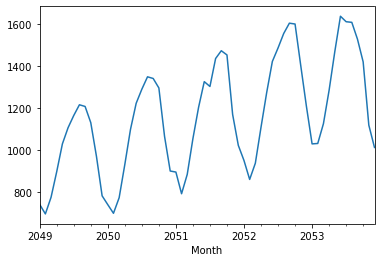

In [10]:
plastic["Sales"].plot() # time series plot 

In [11]:
# Creating a Date column to store the actual Date format for the given Month column
plastic["Date"] = pd.to_datetime(plastic.Month,format="%b-%y")

- Extracting Day, weekday name, month name, year from the Date column using Date functions from pandas 

In [12]:
plastic["month"] = plastic.Date.dt.strftime("%b") # month extraction

In [13]:
plastic["year"] =plastic.Date.dt.strftime("%Y") # year extraction

# EDA: 

<AxesSubplot:xlabel='month', ylabel='year'>

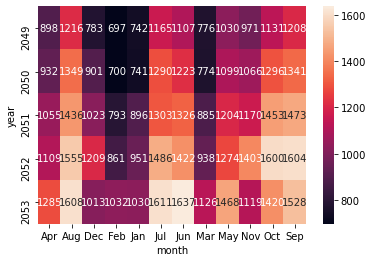

In [14]:
heatmap_y_month = pd.pivot_table(data=plastic,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

## Boxplot: 

<AxesSubplot:xlabel='year', ylabel='Sales'>

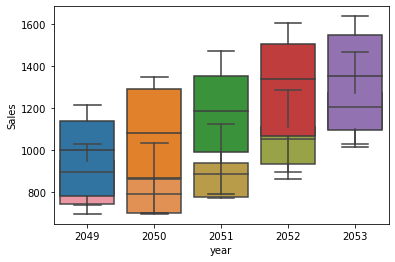

In [15]:
sns.boxplot(x="month",y="Sales",data=plastic)
sns.boxplot(x="year",y="Sales",data=plastic)

<AxesSubplot:xlabel='year', ylabel='Sales'>

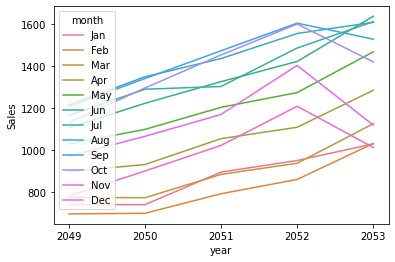

In [16]:
# Line plot for Ridership based on year  and for each month
sns.lineplot(x="year",y="Sales",hue="month",data=plastic)

##### moving average for the time series to understand better about the trend:

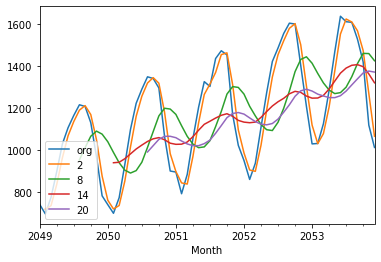

In [17]:
plastic.Sales.plot(label="org")
for i in range(2,24,6):
    plastic["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

<AxesSubplot:xlabel='Month'>

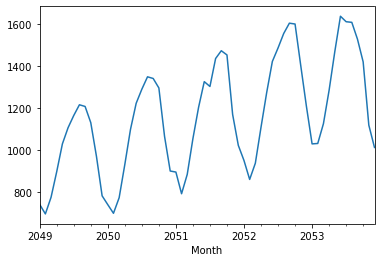

In [18]:
plastic.Sales.plot(label="org")

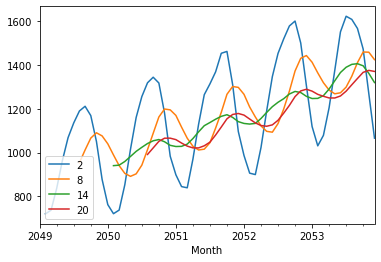

In [19]:
for i in range(2,24,6):
    plastic["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

## Time series decomposition plot :

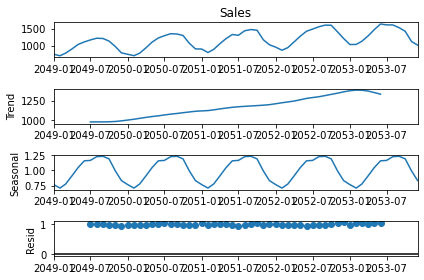

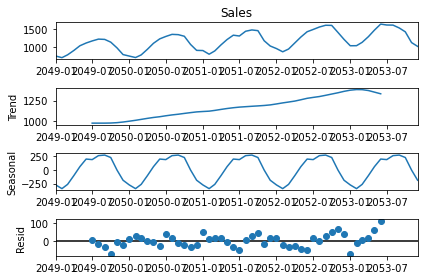

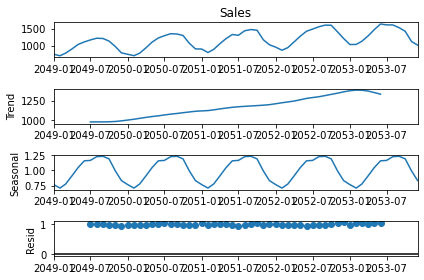

In [20]:
decompose_ts_add = seasonal_decompose(plastic.Sales,model="additive")
decompose_ts_add.plot()
decompose_ts_mul = seasonal_decompose(plastic.Sales,model="multiplicative")
decompose_ts_mul.plot()

### ACF plots and PACF plots on Original data sets :

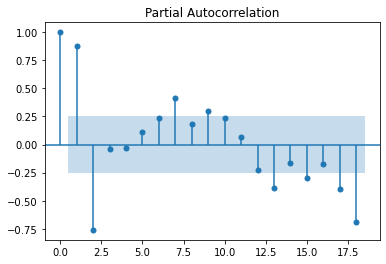

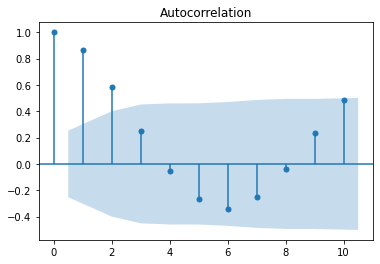

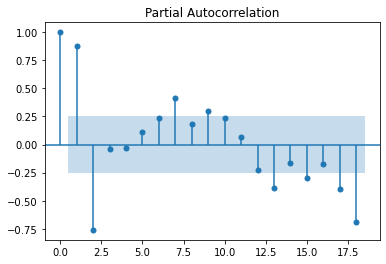

In [21]:
tsa_plots.plot_acf(plastic.Sales,lags=10)
tsa_plots.plot_pacf(plastic.Sales)

In [22]:
Train = plastic.head(48)
Test = plastic.tail(12)

In [23]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

# Simple Exponential Method:

In [24]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) # 17.04

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


17.041821212339293

# Holt method: 

In [26]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) #104.407

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


102.40700712117989

## Holts winter exponential smoothing with additive seasonality and additive trend:

In [28]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) # 10.276

<ipython-input-28-dda4d0588300>:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


10.276928804786655

# Holts winter exponential smoothing with multiplicative seasonality and additive trend:

In [30]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales) #14.858

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


14.858773094760785